# Preparation

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [141]:
data = pd.read_csv("vgsales.csv")
data.dropna(axis=0,how='any',inplace=True)
data = data.reset_index()
data.drop(labels=['index','Rank'],axis=1,inplace=True)

In [142]:
data.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [143]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [144]:
def summ(df,col1,col2):
    df1 = np.sort(df[col1].unique())
    df2 = np.zeros(df[col1].unique().shape)
    
    for i in range(len(df1)):
        for j in range(len(df)):
            if df[col1][j] == df1[i]:
                df2[i] += df[col2][j]

    return df2

# Sale vs Time

### The following graph tells us about the number of video games sold with respect to time

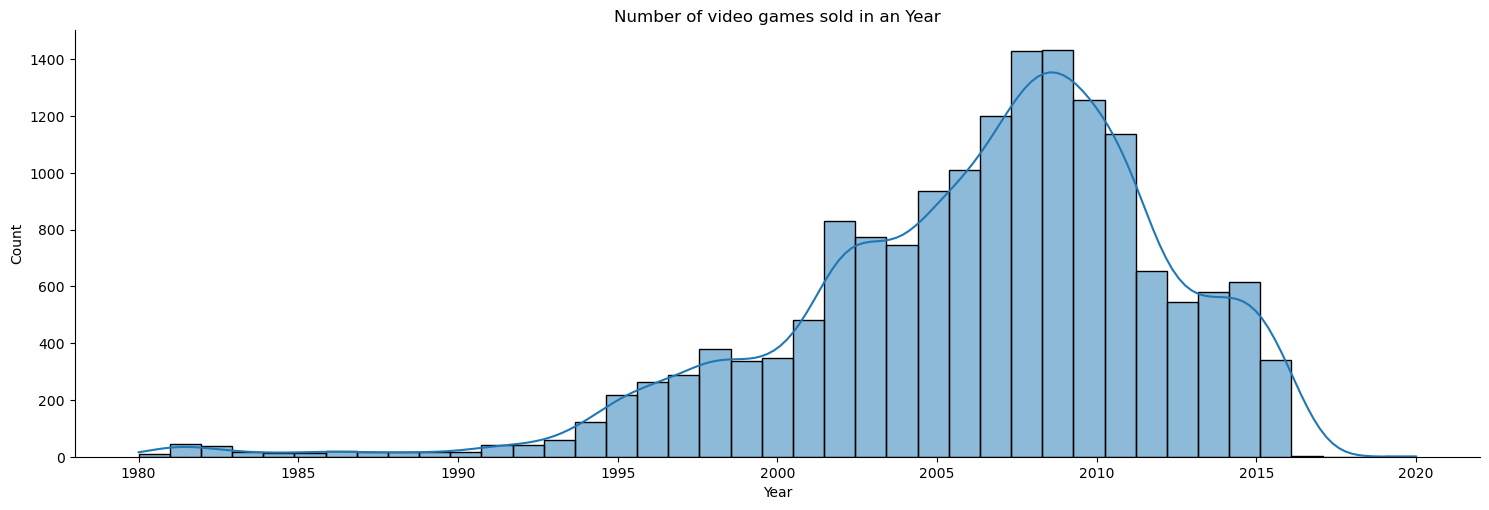

In [158]:
plt.style.use("default")
sns.displot(x='Year',data=data,kde=True,bins=41,aspect=3,height=5).set(title="Number of video games sold in an Year");

### The following graph gives us the relation between time and the sale

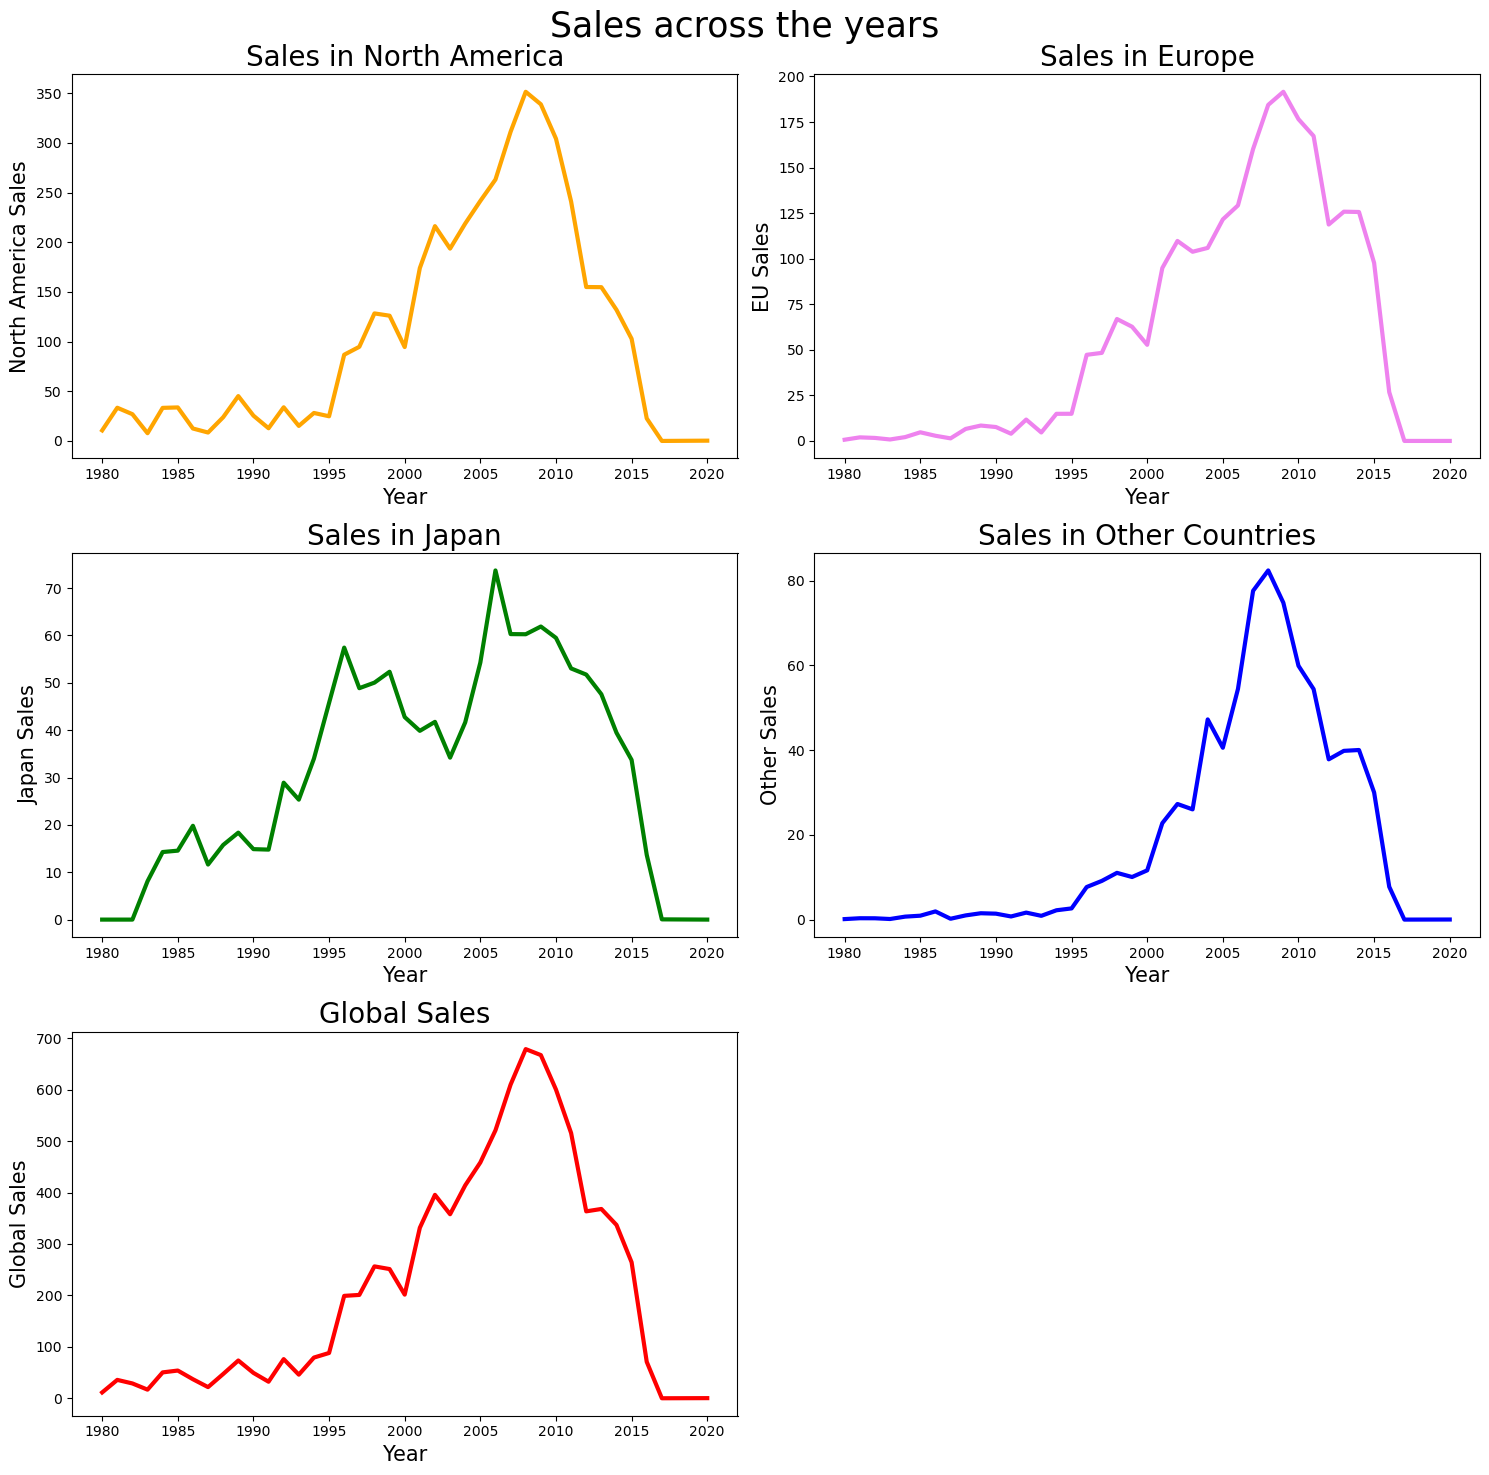

In [146]:
plt.style.use('default')
fig, ax = plt.subplots(3,2, figsize=(15,15))
fig.suptitle("Sales across the years",fontsize=25)

res = summ(data,'Year','NA_Sales')
ax[0, 0].plot(np.sort(data['Year'].unique()),res,color='orange',linewidth=3)
ax[0, 0].set_title("Sales in North America",fontsize=20)
ax[0, 0].set_xlabel("Year",fontsize=15)
ax[0, 0].set_ylabel("North America Sales",fontsize=15)

res = summ(data,'Year','EU_Sales')
ax[0, 1].plot(np.sort(data['Year'].unique()),res,color='violet',linewidth=3)
ax[0, 1].set_title("Sales in Europe",fontsize=20)
ax[0, 1].set_xlabel("Year",fontsize=15)
ax[0, 1].set_ylabel("EU Sales",fontsize=15)

res = summ(data,'Year','JP_Sales')
ax[1, 0].plot(np.sort(data['Year'].unique()),res,color='green',linewidth=3)
ax[1, 0].set_title("Sales in Japan",fontsize=20)
ax[1, 0].set_xlabel("Year",fontsize=15)
ax[1, 0].set_ylabel("Japan Sales",fontsize=15)

res = summ(data,'Year','Other_Sales')
ax[1, 1].plot(np.sort(data['Year'].unique()),res,color='blue',linewidth=3)
ax[1, 1].set_title("Sales in Other Countries",fontsize=20)
ax[1, 1].set_xlabel("Year",fontsize=15)
ax[1, 1].set_ylabel("Other Sales",fontsize=15)

res = summ(data,'Year','Global_Sales')
ax[2, 0].plot(np.sort(data['Year'].unique()),res,color='red',linewidth=3)
ax[2, 0].set_title("Global Sales",fontsize=20)
ax[2, 0].set_xlabel("Year",fontsize=15)
ax[2, 0].set_ylabel("Global Sales",fontsize=15)

fig.delaxes(ax[2,1])
fig.tight_layout()

plt.show()

# Platform vs Sale

### The following graph tells us about the number of video games sold on the platforms

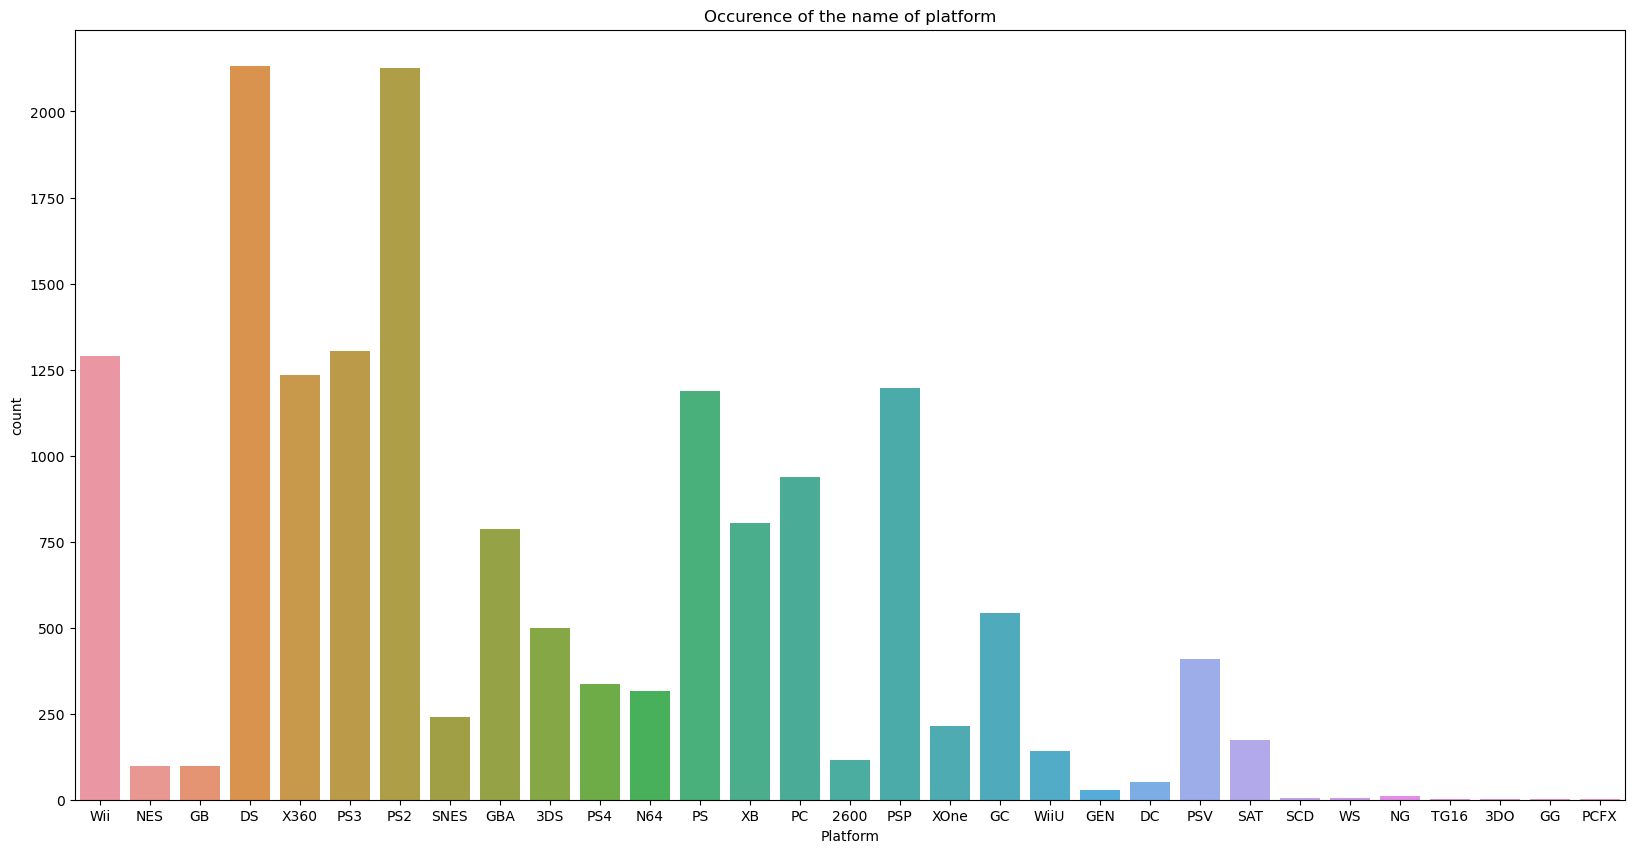

In [147]:
plt.figure(figsize=(20,10))
sns.countplot(x='Platform',data=data).set(title="Occurence of the name of platform");

### The following graph gives us the relation between platform and the sale

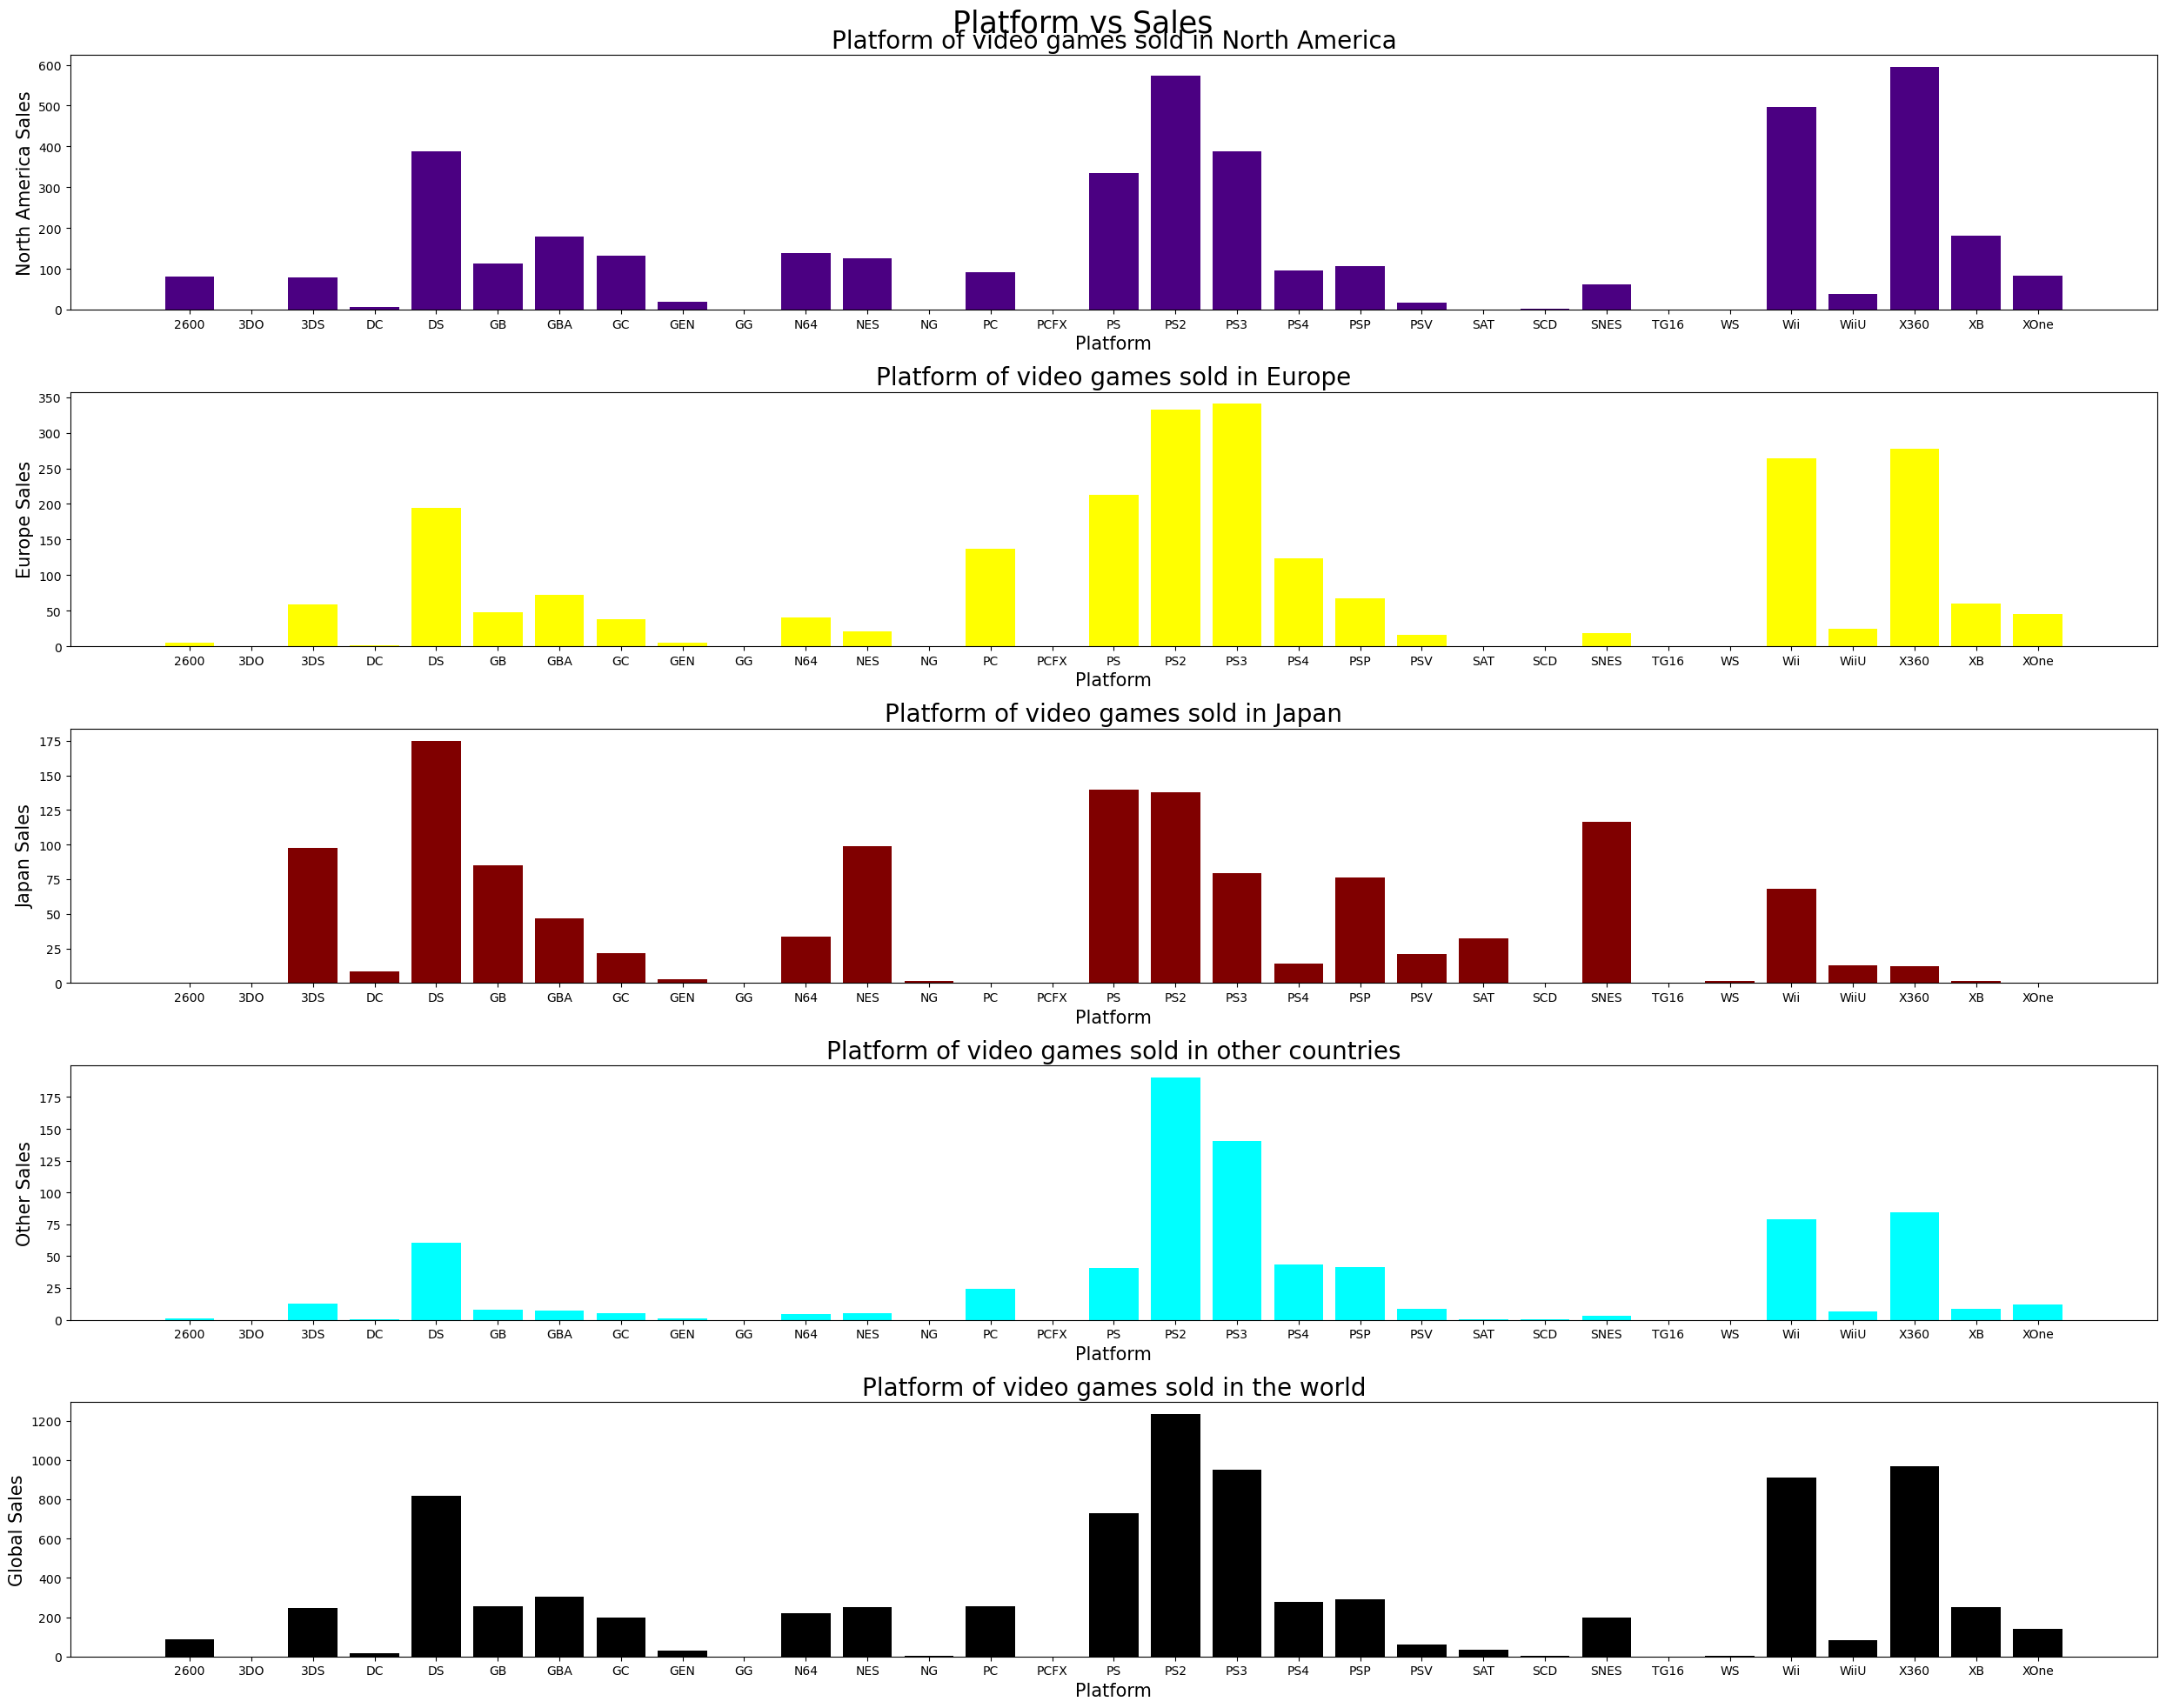

In [148]:
plt.style.use('default')
fig, ax = plt.subplots(5,1, figsize=(25,20))
fig.suptitle("Platform vs Sales",fontsize=25)

res = summ(data,'Platform','NA_Sales')
ax[0].bar(np.sort(data['Platform'].unique()),res,color='indigo')
ax[0].set_title("Platform of video games sold in North America",fontsize=20)
ax[0].set_xlabel("Platform",fontsize=15)
ax[0].set_ylabel("North America Sales",fontsize=15)

res = summ(data,'Platform','EU_Sales')
ax[1].bar(np.sort(data['Platform'].unique()),res,color='yellow')
ax[1].set_title("Platform of video games sold in Europe",fontsize=20)
ax[1].set_xlabel("Platform",fontsize=15)
ax[1].set_ylabel("Europe Sales",fontsize=15)

res = summ(data,'Platform','JP_Sales')
ax[2].bar(np.sort(data['Platform'].unique()),res,color='maroon')
ax[2].set_title("Platform of video games sold in Japan",fontsize=20)
ax[2].set_xlabel("Platform",fontsize=15)
ax[2].set_ylabel("Japan Sales",fontsize=15)

res = summ(data,'Platform','Other_Sales')
ax[3].bar(np.sort(data['Platform'].unique()),res,color='cyan')
ax[3].set_title("Platform of video games sold in other countries",fontsize=20)
ax[3].set_xlabel("Platform",fontsize=15)
ax[3].set_ylabel("Other Sales",fontsize=15)

res = summ(data,'Platform','Global_Sales')
ax[4].bar(np.sort(data['Platform'].unique()),res,color='black')
ax[4].set_title("Platform of video games sold in the world",fontsize=20)
ax[4].set_xlabel("Platform",fontsize=15)
ax[4].set_ylabel("Global Sales",fontsize=15)

fig.tight_layout()

plt.show()

# Genre vs Sale

### The following graph tells us about the number of video games sold with respect to the Genre

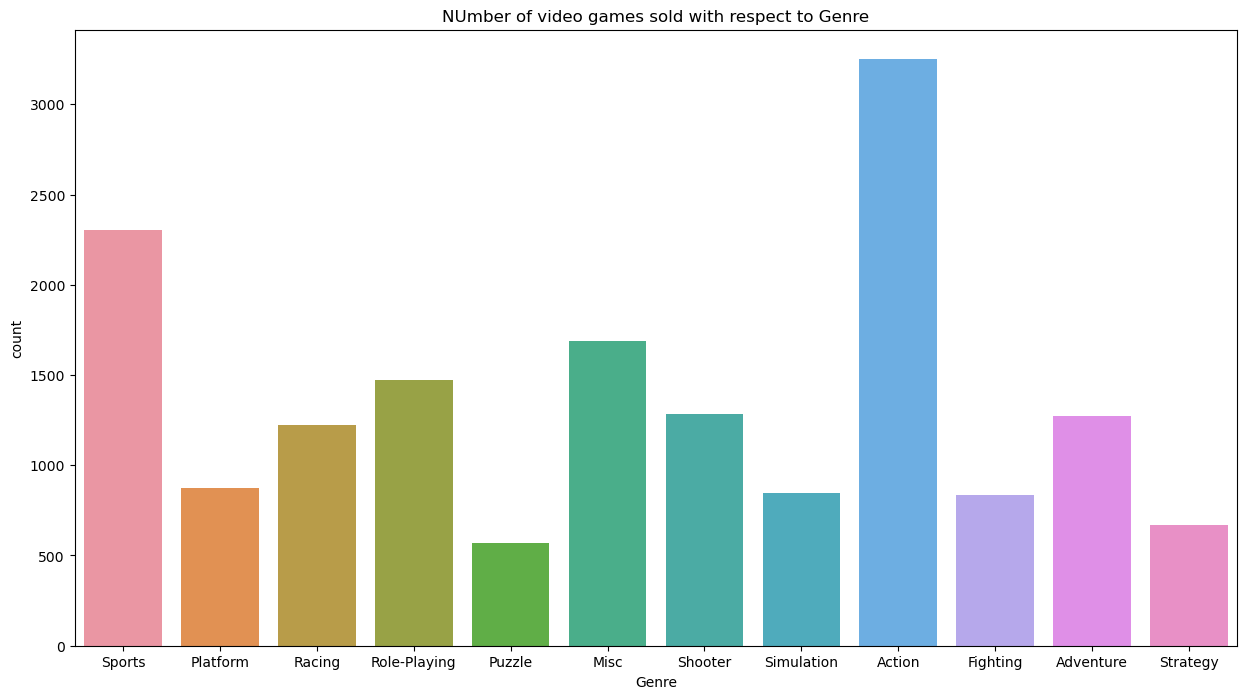

In [149]:
plt.figure(figsize=(15,8))
sns.countplot(x='Genre',data=data).set(title="NUmber of video games sold with respect to Genre");

### The following graph tells us about the genre of video game with respect to the sales

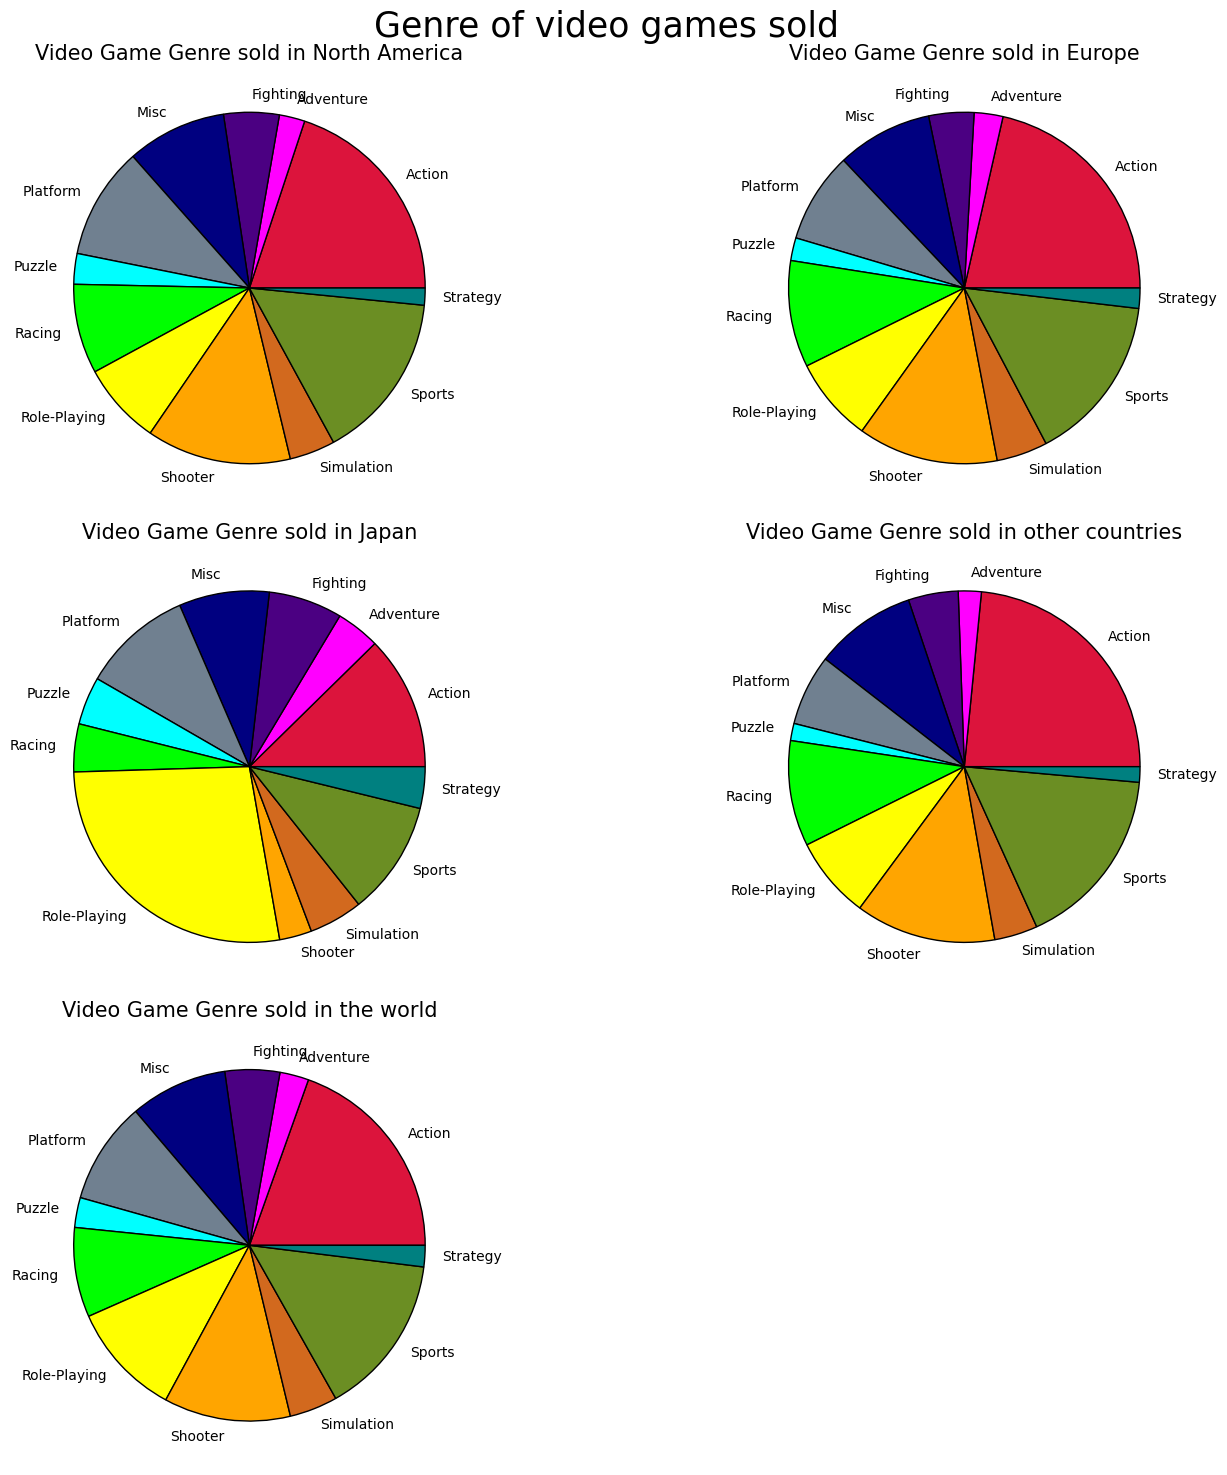

In [150]:
plt.style.use('default')
fig, ax = plt.subplots(3,2, figsize=(15,15))
fig.suptitle("Genre of video games sold",fontsize=25)

colors = ['crimson','magenta','indigo','navy','slategray','cyan','lime','yellow','orange','chocolate','olivedrab','teal']

res = summ(data,'Genre','NA_Sales')
ax[0, 0].pie(res, labels = np.sort(data["Genre"].unique()), colors = colors, wedgeprops={'edgecolor':'black'})
ax[0, 0].set_title("Video Game Genre sold in North America",fontsize=15)

res = summ(data,'Genre','EU_Sales')
ax[0, 1].pie(res, labels = np.sort(data["Genre"].unique()), colors = colors, wedgeprops={'edgecolor':'black'})
ax[0, 1].set_title("Video Game Genre sold in Europe",fontsize=15)

res = summ(data,'Genre','JP_Sales')
ax[1, 0].pie(res, labels = np.sort(data["Genre"].unique()), colors = colors, wedgeprops={'edgecolor':'black'})
ax[1, 0].set_title("Video Game Genre sold in Japan",fontsize=15)

res = summ(data,'Genre','Other_Sales')
ax[1, 1].pie(res, labels = np.sort(data["Genre"].unique()), colors = colors, wedgeprops={'edgecolor':'black'})
ax[1, 1].set_title("Video Game Genre sold in other countries",fontsize=15)

res = summ(data,'Genre','Global_Sales')
ax[2, 0].pie(res, labels = np.sort(data["Genre"].unique()), colors = colors, wedgeprops={'edgecolor':'black'})
ax[2, 0].set_title("Video Game Genre sold in the world",fontsize=15)

fig.delaxes(ax[2,1])
fig.tight_layout()

plt.show()

# Case Study of Sales of PS, PS2, PS3, PS4

In [151]:
l1 = ['PS','PS2','PS3','PS4']
l2 = np.sort(data.Year.unique())

res = np.zeros((4,len(l2)))
for i in range(len(l1)):
    for j in range(len(l2)):
        for k in range(len(data)):
            if (data['Year'][k]==l2[j] and data['Platform'][k]==l1[i]):
                res[i][j] += data["Global_Sales"][k]

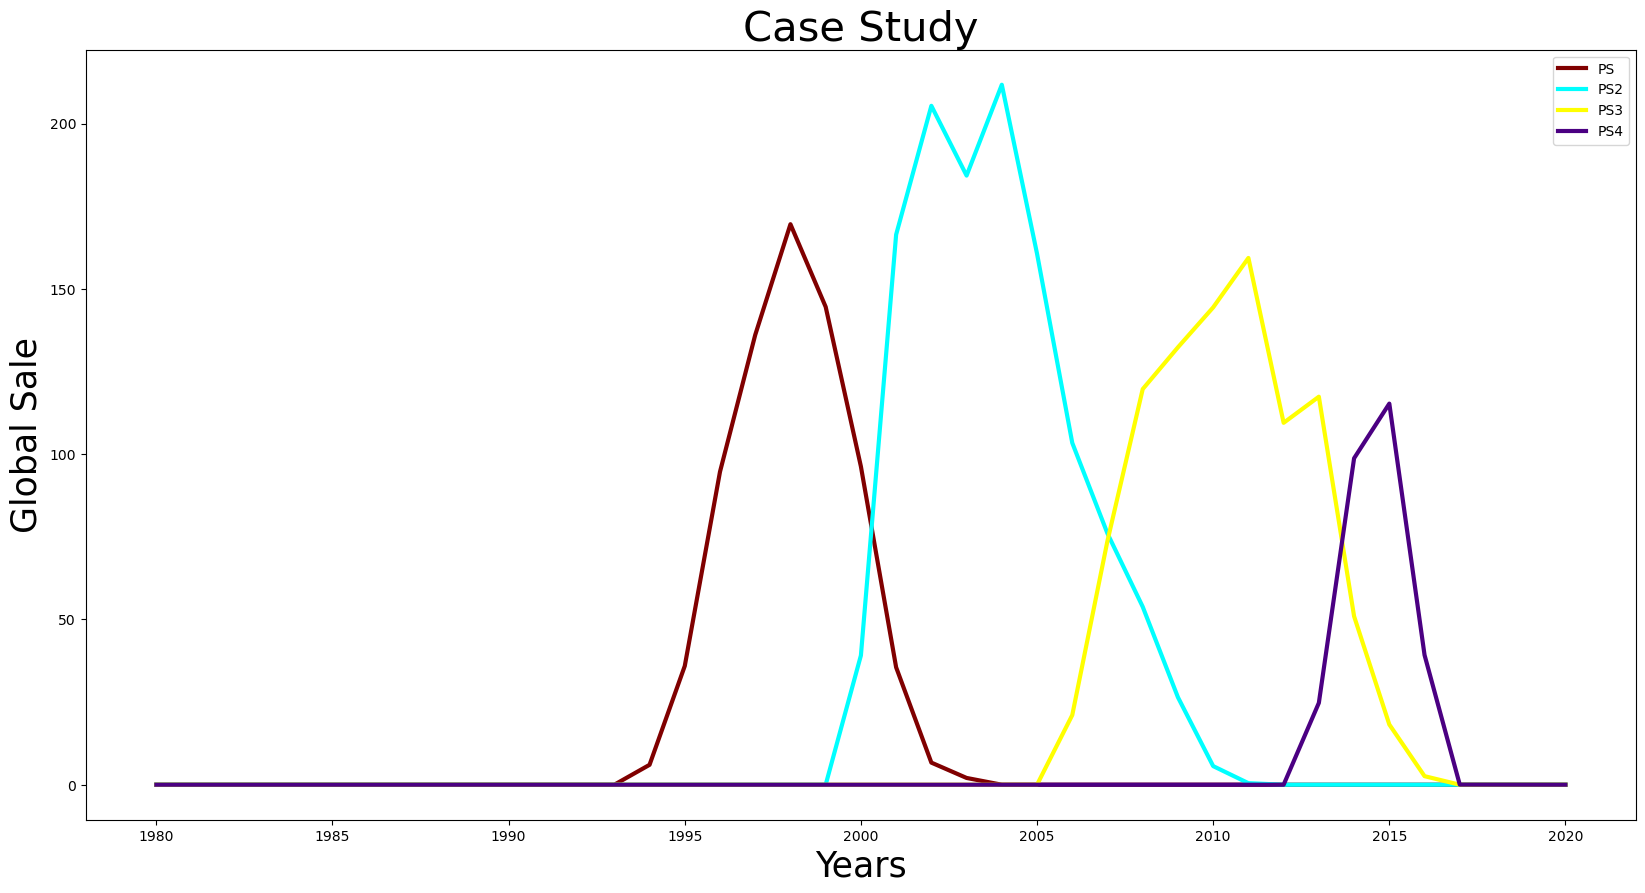

In [152]:
y = np.sort(data.Year.unique())

x1 = res[0:1][:].reshape(y.shape)
x2 = res[1:2][:].reshape(y.shape)
x3 = res[2:3][:].reshape(y.shape)
x4 = res[3:4][:].reshape(y.shape)

plt.style.use('default')
f = plt.figure(figsize=(20,10))
plt.plot(y,x1, color='maroon', label='PS',linewidth=3)
plt.plot(y,x2, color='aqua', label='PS2',linewidth=3)
plt.plot(y,x3, color='yellow', label='PS3',linewidth=3)
plt.plot(y,x4, color='indigo', label='PS4',linewidth=3)
plt.xlabel("Years",fontsize=25)
plt.ylabel("Global Sale",fontsize=25)
plt.title("Case Study",fontsize=30)
plt.legend()
plt.show()

### Use of Heatmap to help find some correlation between the columns

In [153]:
mask = np.zeros_like(data.corr())
t_ind = np.triu_indices_from(mask)
mask[t_ind] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [154]:
data.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


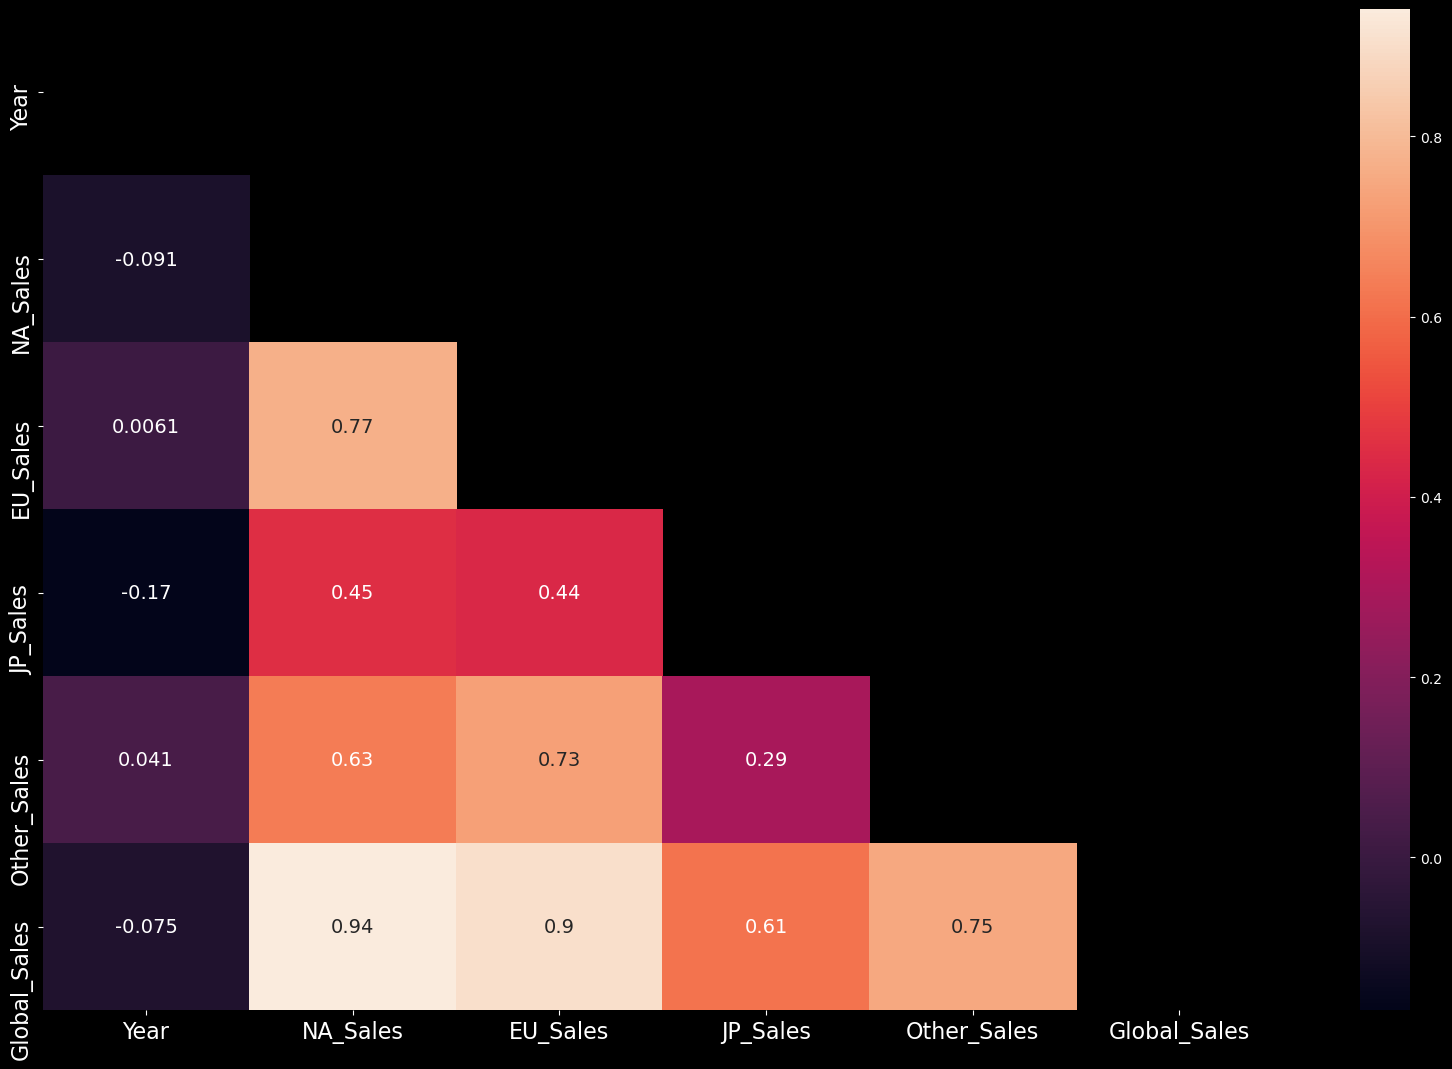

In [155]:
plt.style.use('dark_background')
plt.figure(figsize=(20,13))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

### Checking for any meaningful plots

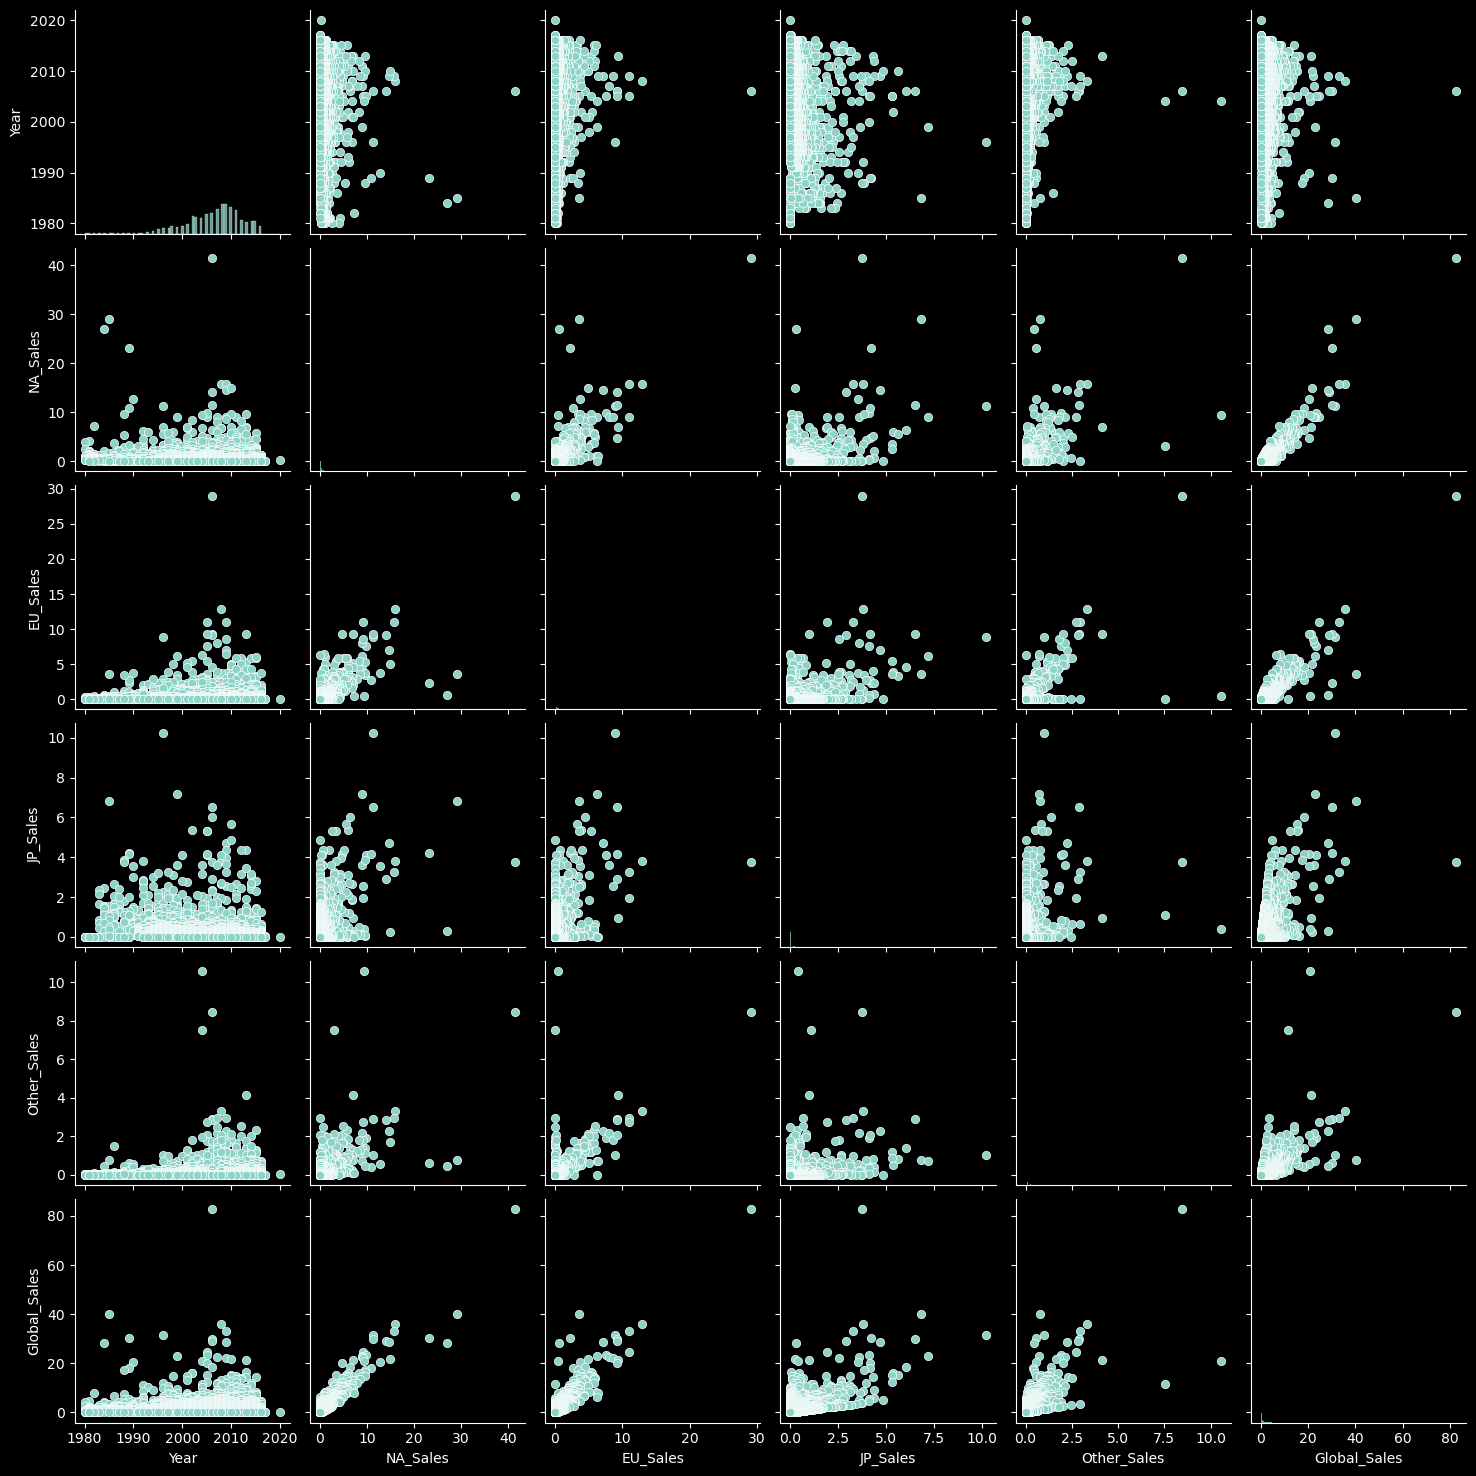

In [156]:
sns.pairplot(data)